In [18]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from sklearn.svm import SVC

path = "/Users/austinwilson/Downloads/weather.csv"

weather = pd.read_csv(path, na_values='NA')

weather.dropna(inplace=True)


In [19]:
def normalize(df, columns):
    for col in columns:
        avg = np.mean(df[col])
        std = np.std(df[col])
        df[col] = ( df[col] - avg ) / std

In [49]:
#columns = ['Rainfall','Sunshine','MaxTemp','Evaporation','RISK_MM','RainTomorrow']

columns = ['Rainfall','Sunshine','RainTomorrow']
# columns = ['Humidity3pm','RISK_MM','RainTomorrow']

svm_data = weather[columns]
# svm_data = svm_data[(svm_data.Rainfall < 10)]
# svm_data = svm_data[(svm_data.Rainfall < 10)]
#categorical_columns = ['WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday']
#svm_data = weather.drop(categorical_columns,axis=1)

svm_data.head()



,Rainfall,Sunshine,RainTomorrow
0,0.0,6.3,Yes
1,3.6,9.7,Yes
2,3.6,3.3,Yes
3,39.8,9.1,Yes
4,2.8,10.6,No


In [50]:
le = LabelEncoder()
svm_data.RainTomorrow = le.fit_transform(svm_data.RainTomorrow)
X = svm_data.drop("RainTomorrow", axis=1)
y = svm_data['RainTomorrow']
svm_data.head(20)

,Rainfall,Sunshine,RainTomorrow
0,0.0,6.3,1
1,3.6,9.7,1
2,3.6,3.3,1
3,39.8,9.1,1
4,2.8,10.6,0
5,0.0,8.2,0
6,0.2,8.4,0
7,0.0,4.6,0
8,0.0,4.1,1
9,16.2,7.7,0


In [51]:
# normalize(svm_data, ["Rainfall","Sunshine","MaxTemp","Evaporation","RISK_MM"])

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(svm_data.shape)

(262, 2)
(262,)
(66, 2)
(66,)
(328, 3)


In [54]:
model = SVC(C=15.0, cache_size=200)
clf = SVC(kernel="linear",C=1000)

In [55]:
model.fit(x_train,y_train)
clf.fit(x_train,y_train)


SVC(C=1000, kernel='linear')

In [56]:
model.score(x_test,y_test)

0.8181818181818182

In [57]:
clf.score(x_test,y_test)

0.8181818181818182

In [324]:
pred = model.predict(x_test)
pred2 = clf.predict(x_test)

In [325]:
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [326]:
le.inverse_transform(pred2)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No'], dtype=object)

In [327]:
le.inverse_transform(y_test)


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No'], dtype=object)

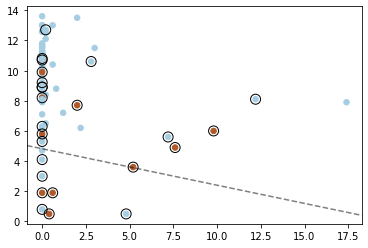

In [58]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_blobs

# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)
X = np.asarray(x_test)
y = np.asarray(y_test)
#X, y = x_test, y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#plt.figure(figsize=(8,6))
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [30]:
54/66

0.8181818181818182

In [31]:
12/66

0.18181818181818182

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
cv_scores = cross_val_score(knn, X, y, cv = 5)

In [76]:
knn.score(x_test,y_test)

0.7727272727272727

In [77]:
cv_scores

array([0.71428571, 0.69230769, 0.84615385, 0.69230769, 0.76923077])

In [78]:
np.mean(cv_scores)

0.7428571428571429